In [1]:
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import cv2
import numpy as np
import os
import json

In [5]:
# Percorsi input/output
PDF_PATH = "Informativa_Riepilogativa_dei_Servizi_di_Pagamento_30giu2025.pdf"
OUTPUT_JSON = "output_spese.json"

In [ ]:
# Percorsi input/output
PDF_PATH = "file.pfd"
OUTPUT_JSON = "output_spese.json"

def preprocess_image(image: Image.Image) -> Image.Image:
    # Converti PIL Image in OpenCV image per miglioramento
    cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return Image.fromarray(thresh)

def extract_text_from_pdf(pdf_path: str):
    print(f"Converto il PDF in immagini: {pdf_path}")
    images = convert_from_path(pdf_path)
    full_text = ""

    for i, image in enumerate(images):
        print(f"Processo pagina {i + 1}")
        # Preprocessing base (facoltativo)
        processed_image = preprocess_image(image)

        text = pytesseract.image_to_string(processed_image, lang="ita+eng")
        full_text += f"--- Pagina {i + 1} ---\n{text}\n"

    return full_text

def parse_transactions(raw_text: str):
    # Funzione di parsing *molto basilare* da personalizzare secondo il formato dei tuoi estratti conto
    transactions = []
    lines = raw_text.split("\n")
    for line in lines:
        if any(char.isdigit() for char in line) and "€" in line:
            transactions.append({"riga": line.strip()})
    return transactions


In [8]:
#def main():
    #raw_text = extract_text_from_pdf(PDF_PATH)
    #transactions = parse_transactions(raw_text)

    #print(f"Scrivo {len(transactions)} transazioni in {OUTPUT_JSON}")
    #with open(OUTPUT_JSON, "w", encoding="utf-8") as f:
    #    json.dump(transactions, f, indent=2, ensure_ascii=False)

In [30]:
import pdfplumber
import pandas as pd

In [45]:
# Apri il file PDF
with pdfplumber.open(PDF_PATH) as pdf:
    # Itera su ogni pagina
    testi = []
    tabelle = []
    for pagina in pdf.pages:
        # Estrai il testo dalla pagina
        testi.append(pagina.extract_text()) 
        
        # Prova a estrarre tabelle dalla pagina
        tabs = pagina.extract_table({
            "vertical_strategy": "lines",         # oppure "text"
            "horizontal_strategy": "lines",       # oppure "text"
            "intersection_tolerance": 5,          # aumenta se le linee non si incrociano perfettamente
            "snap_tolerance": 3,                  # tolleranza per 'agganciare' le linee ai testi
            "join_x_tolerance": 2,                # unisce linee verticali vicine
            "join_y_tolerance": 2,                # unisce linee orizzontali vicine
            "edge_min_length": 3,                 # ignora linee troppo corte
        })
        intestazione = tabs[0][0]
        for i, tabs in enumerate(tabs):
            print(f"\nTabella {i+1}:")
            tabelle.extend(tabs[1:])



Tabella 1:

Tabella 2:

Tabella 3:

Tabella 4:

Tabella 5:

Tabella 6:

Tabella 7:

Tabella 8:

Tabella 9:

Tabella 10:

Tabella 11:

Tabella 12:

Tabella 13:

Tabella 14:

Tabella 15:

Tabella 16:

Tabella 17:

Tabella 18:

Tabella 19:

Tabella 1:

Tabella 2:

Tabella 3:

Tabella 4:

Tabella 5:


In [25]:
for ii, testo in enumerate(testi):
    print(f'=============== Testo {ii+1:02d} ===============')
    print(testo)

=============== Testo 01 ===============
Informativa Riepilogativa Servizi di
pagamento dal 01/06/2025 al 30/06/2025
RINALDI LUCA
VIA MARINO MARMIROLI 1
42020 ALBINEA RE
Imposta di bollo assolta in modo virtuale, ove prevista.
Autorizzazione intendenza di Finanza di Reggio Emilia n. 4369
del 28.03.1983
PER INFORMAZIONI PUO' CONTATTARE IL SUO CONSULENTE DEBORAH TURSI
Dettaglio
DATA OPERAZIONE DATA VALUTA DESCRIZIONE OPERAZIONE IMPORTO A DEBITO IMPORTO A CREDITO
PRELIEVO BANCOMAT
03/06/2025 29/05/2025 50,00
29/05/25,ORE 22:52,TESS.802574245 ALBINEA
BANCOMAT 29/05/25,ORE 23:05,TESS.802574245
03/06/2025 29/05/2025 10,00
MIGUELITA S.R.L
BANCOMAT 29/05/25,ORE 08:56,TESS.802574245
03/06/2025 29/05/2025 1,50
PIRRU LE REGGIANE
BANCOMAT 30/05/25,ORE 21:43,TESS.802574245
04/06/2025 30/05/2025 13,50
DADA BAR E OSTERIA SNC
BANCOMAT 01/06/25,ORE 19:18,TESS.802574245
04/06/2025 01/06/2025 7,23
SIGMA SAN POLO
BONIFICO ISTANTANEO A CREDITO
06/06/2025 06/06/2025 30,00
CATTANI ALESSIO Rif. 11912515764024

In [46]:
trx_df = pd.DataFrame(tabelle,columns=intestazione)

In [47]:
trx_df

,0
0,DATA VALUTA
1,DESCRIZIONE OPERAZIONE
2,IMPORTO A DEBITO
3,None
4,29/05/2025
...,...
91,"1.987,20"
92,
93,TOTALE
94,"1.246,81"


In [148]:
import pdfplumber.table


with pdfplumber.open(PDF_PATH) as pdf:
    page = pdf.pages[1]
    tab = page.extract_tables()[0]
    # Crea un oggetto immagine della pagina
    im = page.to_image(resolution=150)

    # Disegna le linee rilevate nella pagina
    #im.draw_lines(page.lines, stroke="red")
    im.debug_tablefinder({
            "vertical_strategy": "lines",         # oppure "text"
            "horizontal_strategy": "lines",       # oppure "text"
            "explicit_vertical_lines": [page.width*0.05, page.width*0.95],
            #"explicit_horizontal_lines": [20, 800]
            #"intersection_tolerance": 20,          # aumenta se le linee non si incrociano perfettamente
            "snap_x_tolerance": 9,                  # tolleranza per 'agganciare' le linee ai testi
            #"join_x_tolerance": 20,                # unisce linee verticali vicine
            #"join_y_tolerance": 2,                # unisce linee orizzontali vicine
            #"edge_min_length": 1,                 # ignora linee troppo corte
        })


    # Salva il risultato in un'immagine PNG
    #im.save("debug_tabella.png")
    

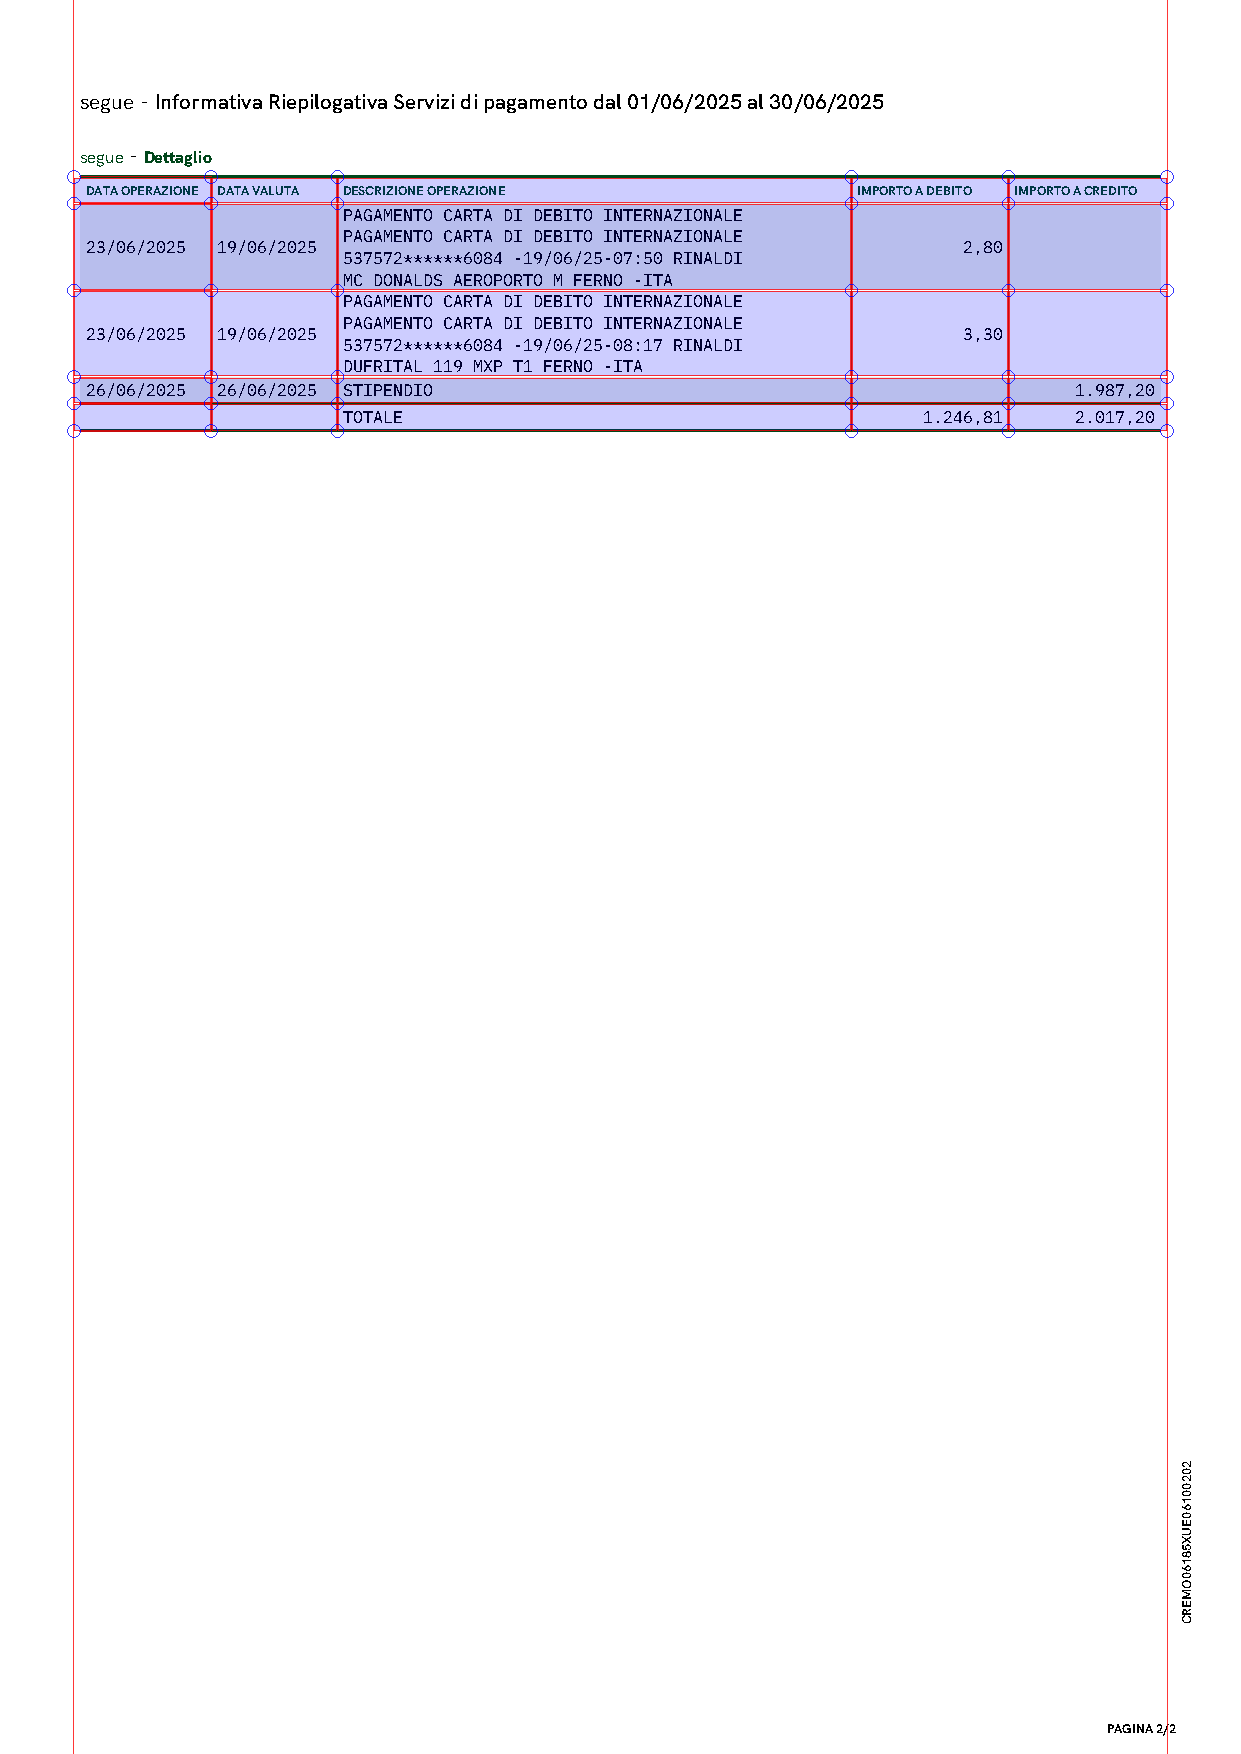

In [149]:
im


In [ ]:
pd.DataFrame(columns=['a']).

,a


In [182]:
trx_df = pd.DataFrame()
with pdfplumber.open(PDF_PATH) as pdf:
    for page in pdf.pages:
        tables = page.extract_tables({
            "vertical_strategy": "lines",         # oppure "text"
            "horizontal_strategy": "lines",       # oppure "text"
            "explicit_vertical_lines": [page.width*0.05, page.width*0.95],
            "snap_x_tolerance": 9,                  # tolleranza per 'agganciare' le linee ai testi
        })
        for tab in tables:
            trx_df = pd.concat([trx_df, pd.DataFrame(tab[1:], columns=tab[0]).dropna(thresh=2)], ignore_index=True)

In [171]:
trx_df.columns

Index(['DATA OPERAZIONE', 'DATA VALUTA', 'DESCRIZIONE OPERAZIONE',
       'IMPORTO A DEBITO', 'IMPORTO A CREDITO'],
      dtype='object')

In [183]:
description_col = 'DESCRIZIONE OPERAZIONE'

In [184]:
if trx_df.iloc[-1][description_col] == 'TOTALE':
    trx_df = trx_df.iloc[:-1]
#trx_df.dropna(thresh=2)

In [185]:
trx_df

,DATA OPERAZIONE,DATA VALUTA,DESCRIZIONE OPERAZIONE,IMPORTO A DEBITO,IMPORTO A CREDITO
0,03/06/2025,29/05/2025,"PRELIEVO BANCOMAT\n29/05/25,ORE 22:52,TESS.802...","50,00",
1,03/06/2025,29/05/2025,"BANCOMAT 29/05/25,ORE 23:05,TESS.802574245\nMI...","10,00",
2,03/06/2025,29/05/2025,"BANCOMAT 29/05/25,ORE 08:56,TESS.802574245\nPI...","1,50",
3,04/06/2025,30/05/2025,"BANCOMAT 30/05/25,ORE 21:43,TESS.802574245\nDA...","13,50",
4,04/06/2025,01/06/2025,"BANCOMAT 01/06/25,ORE 19:18,TESS.802574245\nSI...","7,23",
5,06/06/2025,06/06/2025,BONIFICO ISTANTANEO A CREDITO\nCATTANI ALESSIO...,,"30,00"
6,06/06/2025,04/06/2025,"BANCOMAT 04/06/25,ORE 19:16,TESS.802574245\nCO...","4,25",
7,06/06/2025,04/06/2025,"BANCOMAT 04/06/25,ORE 18:48,TESS.802574245\nHU...","12,00",
8,10/06/2025,06/06/2025,"BANCOMAT 06/06/25,ORE 18:09,TESS.802574245\nAP...","13,20",
9,10/06/2025,06/06/2025,"BANCOMAT 06/06/25,ORE 18:33,TESS.802574245\nAC...","4,00",
